In [89]:
%pylab inline
import galsim
import astropy.table as astTab
import astropy.io.fits as pyfits
from configparser import ConfigParser

Populating the interactive namespace from numpy and matplotlib


In [95]:
cd /work/xiangchong.li/work/massMapSim/

/work/xiangchong.li/work/massMapSim


# run on Gw@ipmu

In [98]:
# information for the VVDS area
def meanBin(zMin,dz,nz):
    return np.arange(zMin,zMin+dz*nz-dz/2.,dz)+dz/2.

parser =   ConfigParser()
configName='./s16a3D/3frames2Starlets/lambda2.5/config_lbd2.5_VVDS.ini'
parser.read(configName)
scale  =   parser.getfloat('transPlane','scale')
ny     =   parser.getint('transPlane'  ,'ny')
nx     =   parser.getint('transPlane'  ,'nx')
xMin   =   parser.getfloat('transPlane','xMin')
yMin   =   parser.getfloat('transPlane','yMin')
nz     =   parser.getint('sourceZ','nz')
zMin   =   parser.getfloat('sourceZ','zMin')
zscale =   parser.getfloat('sourceZ','zscale')
zsBin  =   meanBin(zMin,zscale,nz)

# demo kappa field z=2

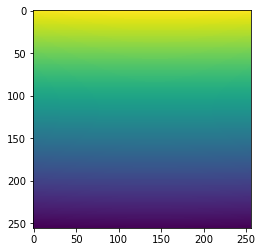

In [97]:
# build stamp
zs=2
xBin=meanBin(xMin,scale,nx)
yBin=meanBin(yMin,scale,ny)
yv,xv=np.meshgrid(yBin,xBin)
xvf=xv.flatten();yvf=yv.flatten()
kappaFin=np.zeros((ny,nx))

haloCat     =   astTab.Table.read('./s16aSim/haloCat.csv')
nhalo       =   len(haloCat)
for hh in haloCat:#we use three halos
    #positionD should be in arcsec
    pos_cl  =   galsim.PositionD(hh['ra']*3600,hh['dec']*3600.)
    halo    =   galsim.nfw_halo.NFWHalo(mass= hh['M_200'],
            conc=hh['conc'], redshift= hh['z_cl'],
            halo_pos=pos_cl ,omega_m= 0.3,
            omega_lam= 0.7)
    kappa=halo.getConvergence(pos=(xvf,yvf),z_s=zs,units = "degree")
    kappa=kappa.reshape((ny,nx))
    kappaFin=kappaFin+kappa

plt.imshow(kappaFin)
pyfits.writeto('./s16aSim/kappa_z2_demo.fits',kappaFin,overwrite=True) 